# AutoViML / Auto_TimeSeries

GitHub: https://github.com/AutoViML/Auto_TS

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from auto_ts import auto_timeseries

%matplotlib inline

Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



# Load Dataset

In [4]:
# Data source: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones
train = pd.read_csv("../data/human-activity-recognition/train.csv")

# Convert labels to binary
train['Activity'] = pd.DataFrame(np.where(train['Activity']=='WALKING_DOWNSTAIRS', 1, 0))

# Create a new date column
train['date'] = pd.date_range(start='1/1/2022', periods=len(train), freq='S')
train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,date
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,0,2022-01-01 00:00:00
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,0,2022-01-01 00:00:01
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,0,2022-01-01 00:00:02


In [7]:
# The max value will be incremented by 1 second and used in test dataset (see below)
train['date'].max()

Timestamp('2022-01-01 02:02:31')

In [9]:
test = pd.read_csv("../data/human-activity-recognition/test.csv")
test['Activity'] = pd.DataFrame(np.where(test['Activity']=='WALKING_DOWNSTAIRS', 1, 0))
test['date'] = pd.date_range(start='1/1/2022 02:02:32', periods=len(test), freq='S')
test.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,date
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,0,2022-01-01 02:02:32
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,0,2022-01-01 02:02:33
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,0,2022-01-01 02:02:34


# Train Model

Start of Fit.....
    Target variable given as = Activity
Start of loading of data.....
    Inputs: ts_column = date, sep = ,, target = ['Activity']
    Using given input: pandas dataframe...
    date column exists in given train data...
    train data shape = (7352, 563)
Alert: Could not detect strf_time_format of date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -17.311878234629035      |
|           p-value           |    5.548023783064744e-30     |
|          #Lags Used         |             5.0              |
| Number of Observations Used |            7346.0            |
|     Critical Value (1%)     |      -3

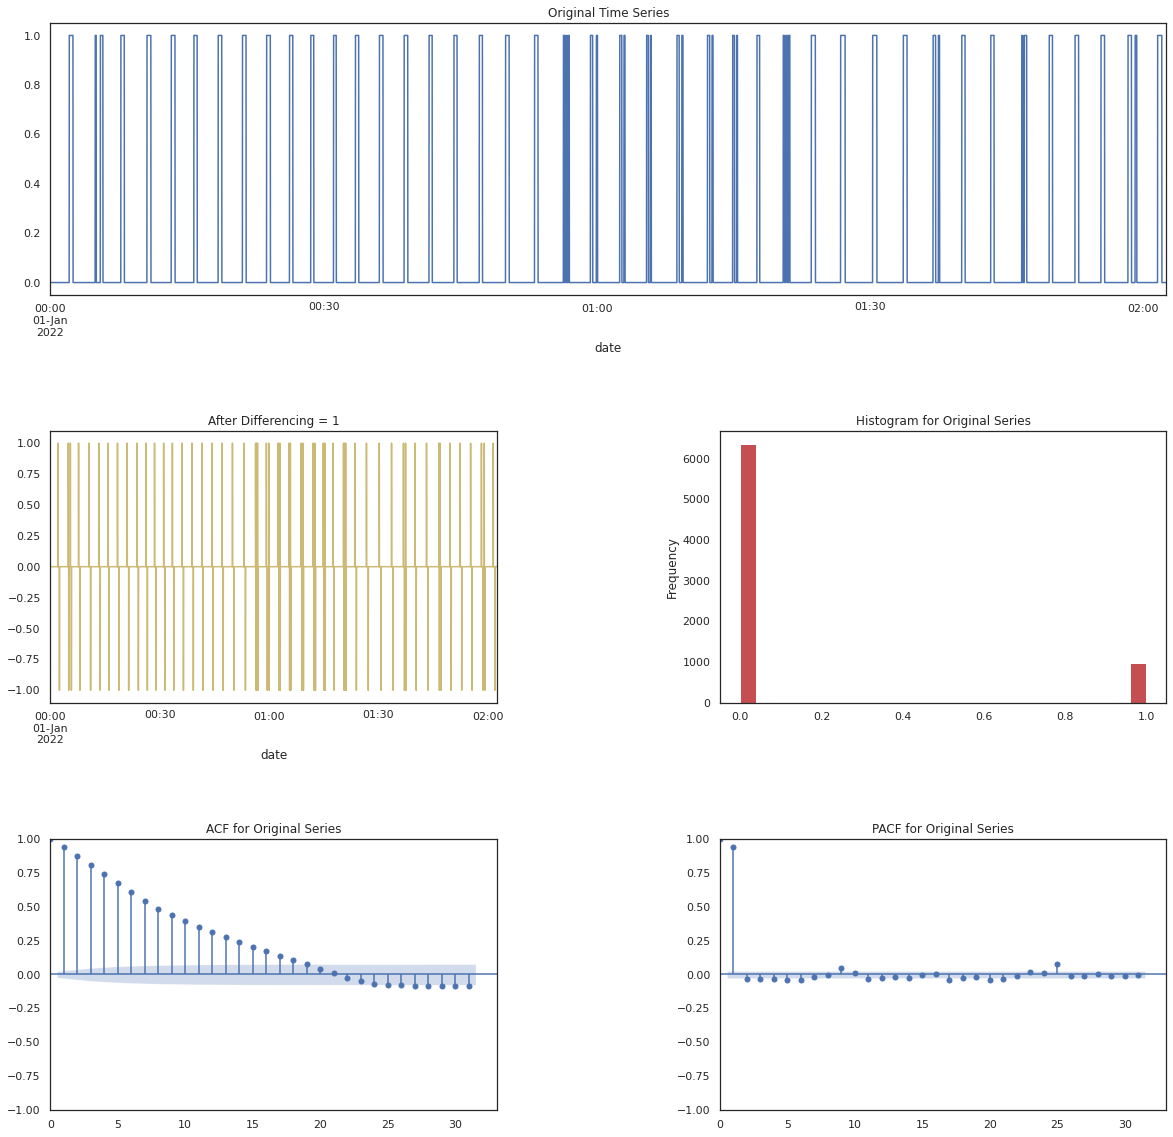

Time Interval is given as S
    Correct Time interval given as a valid Pandas date-range frequency...


Building ML Model



Running Machine Learning Models...

Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    562 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
    We will convert 1 Categorical variables to numeric using a Transformer pipeline...

########### Single-Label Binary_Classification Model Tuning and Training Started ####

Fitting ML model
    1135 variables used in training ML model = ['tBodyAcc-mean()-X(t)', 'tBodyAcc-mean()-Y(t)', 'tBodyAcc-mean()-Z(t)', 'tBodyAcc-std()-X(t)', 'tBo

    For class 1, weight = 6
Cross-validated Error Rate = 0.005 in num rounds = 50
Time taken for Hyper Param tuning of XGBoost (in minutes) = 0.8
    For class 1, weight = 6
Top 10 features:
['Activity(t-1)', 'fBodyAccMag-mad()(t)', 'tBodyAcc-max()-X(t)', 'tBodyAccMag-std()(t)', 'fBodyAccMag-energy()(t)', 'fBodyAccMag-std()(t)', 'tGravityAccMag-std()(t)', 'tGravityAcc-max()-Y(t)', 'tGravityAcc-min()-Y(t-1)', 'angle(Y,gravityMean)(t)']
    Time taken for training XGBoost on entire train data (in minutes) = 1.4
Returning the following:
    Model = <xgboost.core.Booster object at 0x7fccddc93a00>
    Scaler = Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(),
                                                  ['tBodyAcc-mean()-X(t)',
                                                   'tBodyAcc-mean()-Y(t)',
                                                   'tBodyAcc-mean

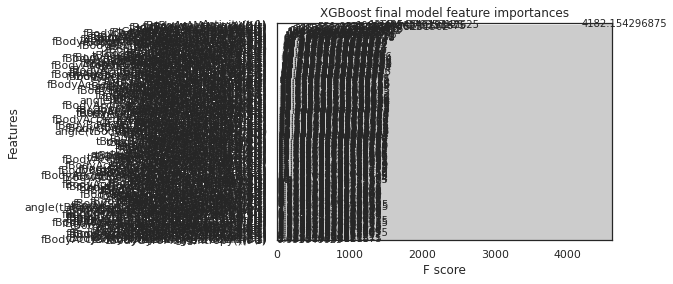

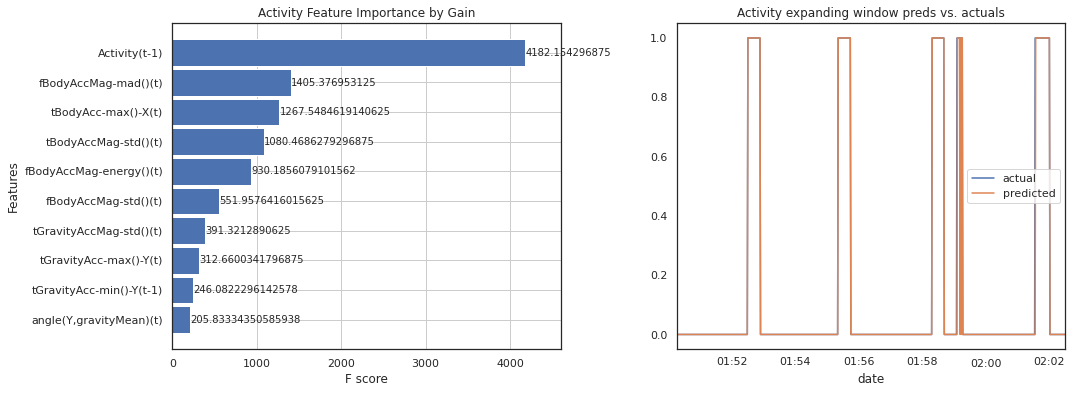

In [17]:
score_type = 'rmse'
time_interval = 'S' # Seconds
# model_type = [ 'best', 'prophet', 'stats', 'ARIMA', 'SARIMAX', 'VAR', 'ML']
model_type = ['ML']

# Create a model
model = auto_timeseries(score_type=score_type,
                        time_interval=time_interval,
                        non_seasonal_pdq=None, 
                        seasonality=False, 
                        seasonal_period=None,
                        model_type=model_type,
                        verbose=1)

ts_column = 'date'
target = 'Activity'
cv = 10

# Start training
model.fit(traindata=train,
          ts_column=ts_column,
          target=target,
          cv=cv)

# Evaluate Results

In [18]:
model.get_leaderboard()

,name,rmse
0,ML,0.073721


<AxesSubplot:xlabel='Model', ylabel='CV Scores'>

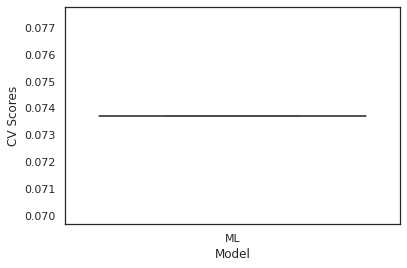

In [21]:
model.plot_cv_scores()

In [24]:
results_dict = model.get_ml_dict()

In [38]:
# TODO: Use the forecast values to calculate training scores
len(results_dict['ML']['forecast'])

1

In [39]:
len(train), len(test)

(7352, 2947)

In [ ]:
# %%time

# test['preds'] = model.predict(test, model='ML', simple=False)['yhat'].values

In [67]:
#preds = 
print(list(test[105:115]['Activity']))

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [75]:
%%time

test_sample = test[105:115]
test_sample['preds'] = model.predict(test_sample, model='ML', simple=False)['Activity'].values

Predicting using test dataframe shape = (10, 564) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for date. Provide strf_time format during "setup" for better results.
ML predictions completed
CPU times: user 1min 21s, sys: 741 ms, total: 1min 21s
Wall time: 1min 21s


In [70]:
test_sample['Activity']

105    0
106    0
107    0
108    0
109    1
110    1
111    1
112    1
113    1
114    1
Name: Activity, dtype: int64

In [73]:
pred_sample

array([0.27964708, 0.27378592, 0.27378592, 0.27378592, 0.5952335 ,
       0.7189602 , 0.7256997 , 0.7256997 , 0.69962764, 0.7256987 ],
      dtype=float32)

<AxesSubplot:>

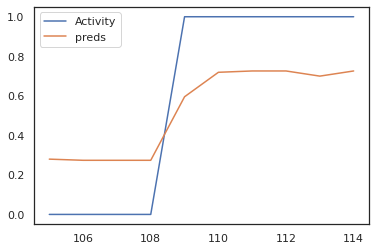

In [76]:
test_sample[['Activity', 'preds']].plot()

## Notes 

Apparently, Auto_TS doesn't support time series classification task.